# **Capstone Project 2 - DATA ANALYSIS**

Imron Rosidi

Sakila - Film (Fokus Analysis)

## **Question**

**General**

1. Bagaimana konteks bisnis berdasarkan dengan data yang telah diberikan?
2. Ada berapa banyak tabel yang disediakan oleh database yang tersedia? Jabarkan setiap tabelnya. Jika terdapat ERD, silahkan ditampilkan.

**SQL**

1. Tampilkan fokus kolom analisis yaitu film pada *Sakila*.
2. Data apa saja yang dapat dianalisis dari database dan bagaimana cara mendapatkan informasi tersebut dari tabel-tabel yang ada di dalam database *Sakila*?

**Data Preparation & Manipulation**

1. Apakah terdapat anomali data berupa missing values? Jika ada, bagaimana penanganannya?
2. Apakah terdapat anomali data berupa kesalahan tipe data? Jika ada, bagaimana penanganannya?
3. Apakah terdapat anomali data berupa data duplicate? Jika ada, bagaimana penanganannya?
4. Apakah terdapat feature yang tidak terpakai?
5. Apakah terdapat data outliers? Jika ada, bagaimana penanganannya? 

**Data Visualisation & Statistics**

1. Film apa saja yang paling sering disewa dan apa strategi yang bisa diambil dari temuan tersebut?
2. Film apa saja yang memiliki nilai sewa harian (rate_per_day) terbesar dan bagaimana minat customer terhadap film tersebut? dan kesimpulan apa yang dapat diambil?
3. Apakah terdapat korelasi antara tiap variable? Jika iya, variable mana saja yang memengaruhi satu sama lain?

## **Context**

Sebuah toko yang menyediakan layanan sewa DVD ingin mengetahui secara umum gambaran bisnis yang telah berjalan dengan fokus utamanya yaitu jenis film yang disewakan toko tersebut. Pemilik toko ingin mendapatkan insight bagaimana meningkatkan kepuasan pelanggan dan menaikkan keuntungan toko dengan cara menyediakan jenis film yang tepat pada customer yang tepat.

## **Database Information**

Sumber database : https://downloads.mysql.com/docs/sakila-db.zip

Database memiliki 16 tabel yang memiliki data dan informasi :

- Actor : menyimpan informasi daftar untuk semua aktor.
- Address : menyimpan informasi alamat untuk pelanggan, staf, dan toko.
- Categories : menyimpan daftar kategori yang dapat ditetapkan untuk film.
- City : menyimpan informasi daftar kota.
- Country : menyimpan informasi daftar negara.
- Customers : menyimpan informasi daftar semua pelanggan.
- Film : menyimpan daftar semua film yang berpotensi tersedia di toko.
- Film_Actor : digunakan untuk mendukung banyak hubungan antara film dan aktor.
- Film_Category : digunakan untuk mendukung banyak hubungan antara film dan kategori.
- Film_Text : berisi kolom film_id, judul dan deskripsi dari tabel film, dengan isi tabel tetap sinkron dengan tabel film.
- Inventory : berisi satu baris untuk setiap salinan film tertentu di toko tertentu.
- Language : berisi tabel pencarian yang mencantumkan kemungkinan bahasa yang dimiliki film untuk bahasa lain dan bahasa aslinya.
- Payment : mencatat setiap pembayaran yang dilakukan oleh pelanggan, dengan informasi seperti jumlah dan sewa yang dibayarkan (bila berlaku).
- Rental : berisi satu baris untuk setiap penyewaan setiap item inventaris dengan informasi tentang siapa yang menyewa item apa, kapan disewa, dan kapan dikembalikan.
- Staff : daftar semua anggota staf, termasuk informasi untuk alamat email, informasi login, dan gambar.
- Store : daftar semua toko dalam sistem.

Setiap tabel yang tertera pada database dapat terhubung, baik secara langsung maupun tidak langsung, sehingga setiap informasi dari database ini akan dapat saling berkaitan.

**Hubungan Antar Tabel**

berikut ini Entity Relationship Diagram (ERD) untuk database "Sakila"

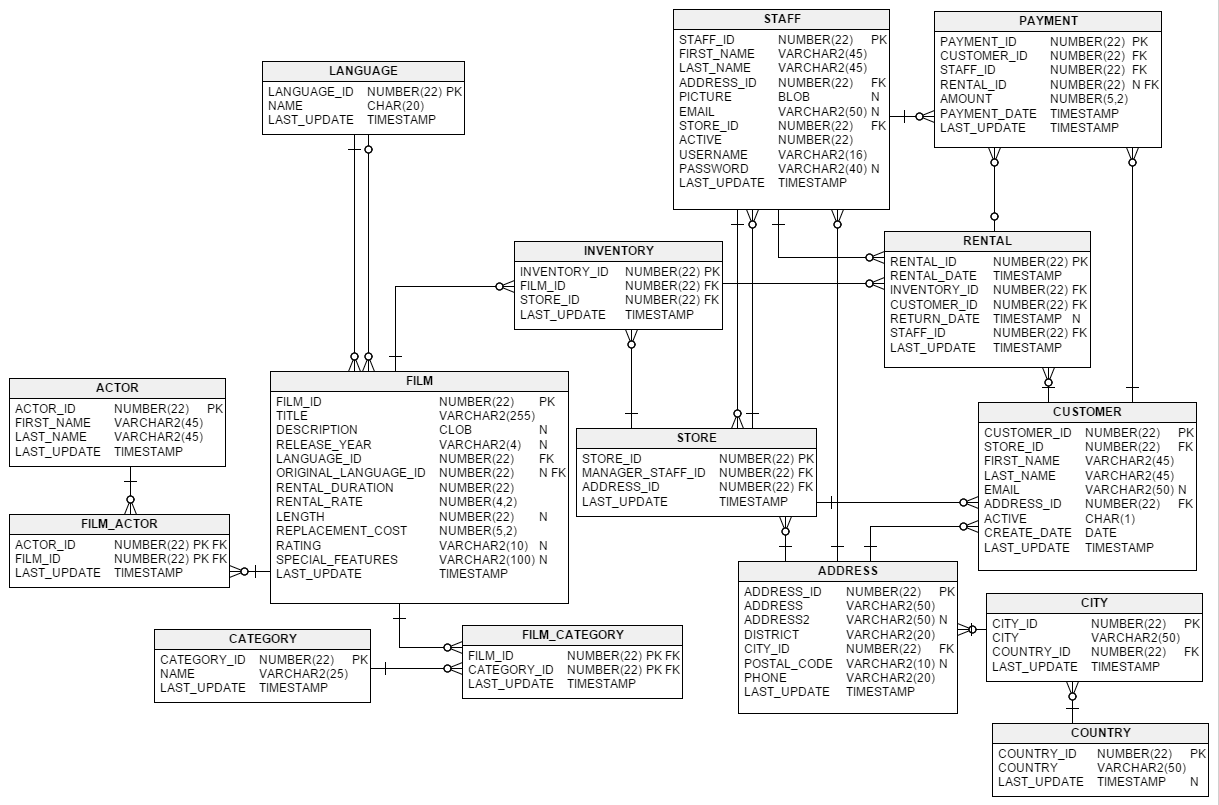

In [5]:
from IPython.display import Image
Image('ERD Sakila.png')

# **DATABASE**

## **Connecting To Database**

Bagian ini merupakan langkah awal untuk mulai melakukan proses analisis data. Pertama adalah membuat koneksi ke database di mana seperti yang sudah dijelaskan sebelumnya, database yang akan digunakan adalah database ``sakila``. Dengan melakukan koneksi ini, kita dapat mengakses seluruh tabel yang ada pada database.


In [125]:
# Import Modules

import pandas as pd
import numpy as np
import mysql.connector as sqlcon
import seaborn as sns
import statsmodels.api as sm
import pylab
import matplotlib.pyplot as plt

In [126]:
# Connect To Database

mydb = sqlcon.connect(
    host = 'localhost',
    user = 'root',
    passwd = 'Maret1992',
    database = 'sakila'
)

Selain melakukan koneksi ke database, hal lain yang perlu dilakukan pada bagian awal ini adalah membuat sebuah fungsi untuk menuliskan query yang kemudian akan disimpan dalam bentuk DataFrame. Tujuannya adalah agar data hasil query yang dibuat dapat disimpan dan digunakan untuk keperluan analisis data. Nantinya, di sini terdapat 2 query untuk mengambil data-data yang ada di database, bukan hanya berasal dari 1 tabel, tapi juga akan melibatkan hubungan antar tabel.

In [127]:
# Query Function

curs = mydb.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    data = pd.DataFrame(result, columns=curs.column_names)
    return data

**Data Detail**

Berikut merupakan isi tabel film yang akan menjadi fokus analisis dari database sakila :

In [128]:
dataUtama = sql_table (
    '''
    SELECT * From film
    ''')
dataUtama

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"{Behind the Scenes, Deleted Scenes}",2006-02-15 05:03:42
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"{Deleted Scenes, Trailers}",2006-02-15 05:03:42
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"{Deleted Scenes, Trailers}",2006-02-15 05:03:42
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"{Behind the Scenes, Commentaries}",2006-02-15 05:03:42
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,{Deleted Scenes},2006-02-15 05:03:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,None,6,0.99,183,9.99,G,"{Behind the Scenes, Trailers}",2006-02-15 05:03:42
996,997,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,2006,1,None,4,0.99,179,14.99,NC-17,"{Behind the Scenes, Trailers}",2006-02-15 05:03:42
997,998,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,2006,1,None,6,0.99,105,10.99,NC-17,{Deleted Scenes},2006-02-15 05:03:42
998,999,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,2006,1,None,5,2.99,101,28.99,R,"{Deleted Scenes, Trailers}",2006-02-15 05:03:42


**Tabel Analysis**

Berikut merupakan data film yang diambil dari database sakila.

Pertama membuat Common Table Expression (CTE) tabel rent_by_film_id yang diambil dari tabel payment, rental, inventory, dan film. Data yang diambil disini adalah jumlah kolom amount dari tabel payment yang dikumpulkan berdasarkan film_id dan kolom film_id yang diambil dari tabel film. Sedangkan tabel rental dan inventory digunakan untuk melakukan join antara tabel payment dan film.

Kemudian dilakukan left join antara tabel film dengan tabel category dan CTE rent_by_film_id. Kemudian data yang diambil untuk analisa adalah sebagai berikut :

- film_id dari tabel film
- title dari tabel film
- description dari tabel film
- release_year dari tabel film
- rental_duration dari tabel film
- rental_rate dari tabel film
- rating dari tabel film
- category dari tabel category
- rent dari tabel rent_by_film_id

Semua informasi tersebut kemudian dijadikan dalam sebuah DataFrame yang nantinya akan diolah informasinya.

In [155]:
# Query 1

data = sql_table(
'''
-- CTE for rent_by_film
with rent_by_film_id as (
	SELECT count(p.amount) as rent, i.film_id
	FROM payment p
	LEFT JOIN rental r ON p.rental_id = r.rental_id
	LEFT JOIN inventory i ON r.inventory_id = i.inventory_id
	LEFT JOIN film f ON i.film_id = f.film_id
	GROUP BY film_id
)

-- Table for analysis (focus at film)
SELECT f.film_id, f.title, f.description, f.release_year, f.language_id, f.rental_duration, f.rental_rate, f.length, f.rating, 
	c.name as category, 
	rf.rent
FROM film f
LEFT JOIN film_category fc ON f.film_id = fc.film_id
LEFT JOIN category c ON fc.category_id = c.category_id
LEFT JOIN rent_by_film_id rf ON f.film_id = rf.film_id; 
'''
)

## **DATA PREPARATION & MANIPULATION**

Sebelum melakukan analisis pada data, terlebih dahulu akan dilakukan manipulasi data terkait anomali seperti ```missing value```, ```kesalahan tipe data```, ```outlier```, dan ```data duplikat```. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi, serta melihat statistiknya.

**Anomalies In Data Type**

Untuk mengecek kesalahan tipe data, akan coba ditampilkan 5 data teratas kemudian dibandingkan dengan general info dari dataframe

In [156]:
#Cek 5 Data Teratas
data.head()

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,rating,category,rent
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,PG,Documentary,23.0
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,3,4.99,48,G,Horror,7.0
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,7,2.99,50,NC-17,Documentary,12.0
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,5,2.99,117,G,Horror,23.0
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,6,2.99,130,G,Family,12.0


In [157]:
#Cek General Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   film_id          1000 non-null   int64  
 1   title            1000 non-null   object 
 2   description      1000 non-null   object 
 3   release_year     1000 non-null   int64  
 4   language_id      1000 non-null   int64  
 5   rental_duration  1000 non-null   int64  
 6   rental_rate      1000 non-null   object 
 7   length           1000 non-null   int64  
 8   rating           1000 non-null   object 
 9   category         1000 non-null   object 
 10  rent             958 non-null    float64
dtypes: float64(1), int64(5), object(5)
memory usage: 86.1+ KB


**Analisis Komposisi Data**

Dilihat dari komposisi data diatas, data terdiri dari 11 kolom dan 1000 data. Terdapat 3 tipe data yang ada di dalam dataframe yaitu object, int dan float.

Terdapat 1 kolom yang tidak memiliki lengkap 1000 data yaitu kolom rent, kemungkinannya adalah adanya missing data pada kolom tersebut.

Selain itu pada kolom rental_rate, tipe data yang dimiliki adalah object, yang seharusnya kolom tersebut memiliki tipe data numerik.

**Mengatasi Missing Value**

In [158]:
# Check Missing Value (Secara Jumlah)

data.isna().sum()

film_id             0
title               0
description         0
release_year        0
language_id         0
rental_duration     0
rental_rate         0
length              0
rating              0
category            0
rent               42
dtype: int64

Pada kolom rent data yang memiliki missing values sebanyak 42 data, hal ini dikarenakan tidak adanya data nilai penyewaan pada film tersebut, oleh karena itu nilai missing value akan diganti dengan nol (0) yang menunjukkan bahwa tidak adanya hasil sewa dari film tersebut.

In [159]:
# Mengganti nilai NaN pada kolom rent dengan nilai nol (0)

data['rent'].fillna(0, inplace=True)

In [160]:
# Check Kembali Missing Value (Secara Jumlah)

data.isna().sum()

film_id            0
title              0
description        0
release_year       0
language_id        0
rental_duration    0
rental_rate        0
length             0
rating             0
category           0
rent               0
dtype: int64

**Mengatasi Kesalahan pada Type Data**

Sebelumnya telah dijelaskan ada beberapa data dari dataframe yang memiliki format data yang tidak sesuai yaitu rental_rate. Sebelum data tersebut dianalisa baiknya dilakukan perbaikan dengan mengubah ke tipe yang sesuai terhadap data tersebut.

In [161]:
# Mengubah tipe data ke numeric
data['rental_rate'] = pd.to_numeric(data['rental_rate'])

In [162]:
#Cek Kembali General Information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   film_id          1000 non-null   int64  
 1   title            1000 non-null   object 
 2   description      1000 non-null   object 
 3   release_year     1000 non-null   int64  
 4   language_id      1000 non-null   int64  
 5   rental_duration  1000 non-null   int64  
 6   rental_rate      1000 non-null   float64
 7   length           1000 non-null   int64  
 8   rating           1000 non-null   object 
 9   category         1000 non-null   object 
 10  rent             1000 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 86.1+ KB


**FEATURE DATA ANALISIS**

Dari data yang sudah dibersihkan dan diolah menjadi data yang bisa dianalisis maka data akan dipakai untuk melihat  berapa harga sewa yang harus dibayarkan untuk penyewaan per hari untuk setiap film.

```rate_per_day```
Menentukan ```rate_per_day``` atau harga sewa yang harus dibayarkan untuk penyewaan film per harinya. Adapun nilai ```rate_per_day``` adalah nilai ```rental_rate``` dibagi dengan ```rental_duration```.

In [163]:
data['rate_per_day'] = data['rental_rate']/data['rental_duration']
data['rate_per_day'] = round(pd.to_numeric(data['rate_per_day']),2)

**Data Outlier**

Outlier adalah data yang menginformasikan suatu data yang jauh berbeda dibandingkan terhadap keseluruhan data. Tidak setiap outlier itu buruk dan harus dihapus atau dihilangkan.

In [164]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
film_id,1000.0,500.50000,288.819436,1.00,250.75,500.50,750.25,1000.00
release_year,1000.0,2006.00000,0.000000,2006.00,2006.00,2006.00,2006.00,2006.00
language_id,1000.0,1.00000,0.000000,1.00,1.00,1.00,1.00,1.00
rental_duration,1000.0,4.98500,1.411654,3.00,4.00,5.00,6.00,7.00
rental_rate,1000.0,2.98000,1.646393,0.99,0.99,2.99,4.99,4.99
length,1000.0,115.27200,40.426332,46.00,80.00,114.00,149.25,185.00
rent,1000.0,16.04400,7.348065,0.00,11.00,16.00,21.00,34.00
rate_per_day,1000.0,0.64983,0.422107,0.14,0.25,0.60,1.00,1.66


Dari tabel deskripsi di atas, dapat dilihat matrix min, Q1, Q2, Q3, dan max tidak terlihat kecenderungan memiliki outlier pada semua kolom.

**Data Duplicate**

Anomali berikutnya yang bisa ditemui adalah data yang duplikat. Tentu saja data yang bersifat duplikat ini akan menjadi sesuatu hal yang akan mengganggu proses analisis data. Untuk itu akan dicoba untuk melihat data duplikat seperti di bawah ini.

In [165]:
data[data.duplicated()]

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,rating,category,rent,rate_per_day


Dari tabel di atas, dapat dilihat bahwa pada data ini tidak memiliki data duplikat.

**Data Summary**

In [166]:
list = []

for col in data.columns:
    list.append([col, data[col].dtype, len(data),data[col].isna().sum(),
        round((data[col].isna().sum()/len(data[col])) * 100,2), data[col].nunique()])

Desc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value', 
    'Missing Value Percentage', 'Number of Unique'],data=list)

Desc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage,Number of Unique
0,film_id,int64,1000,0,0.0,1000
1,title,object,1000,0,0.0,1000
2,description,object,1000,0,0.0,1000
3,release_year,int64,1000,0,0.0,1
4,language_id,int64,1000,0,0.0,1
5,rental_duration,int64,1000,0,0.0,5
6,rental_rate,float64,1000,0,0.0,3
7,length,int64,1000,0,0.0,140
8,rating,object,1000,0,0.0,5
9,category,object,1000,0,0.0,16


Dari informasi tabel di atas dapat dilihat bahwa kolom release_year dan language_id pada tabel hanya memiliki 1 unique value yang menunjukan bahwa data tersebut sama untuk semua film. Karena itu kolom tersebut akan kita hapus karena tidak banyak informasi yang dapat digali melaluinya.

In [167]:
data.drop(['release_year','language_id'], axis=1, inplace=True)

## **DATA VISUALIZATION**

Setelah mendapatkan data yang sudah 'bersih' dan siap untuk digunakan. Dalam menganalisis data berikutnya akan digunakan data visualiasi karena akan lebih mudah dipahami dan diambil kesimpulan dan insight yang akan berguna bagi toko penyewaan DVD.

**TOP 5**

Top 5 Most Rent Film

Berikut ini adalah film-film yang banyak diminati pelanggan untuk disewa.

<AxesSubplot:xlabel='title', ylabel='rent'>

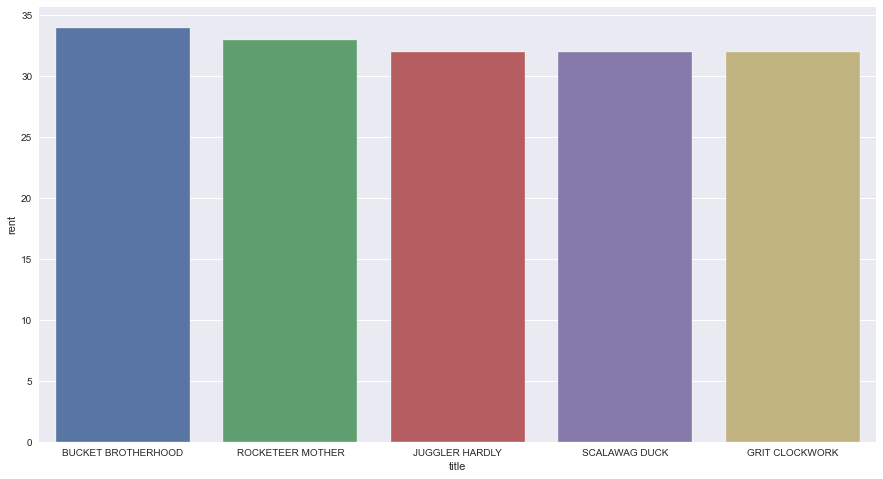

In [168]:
plt.figure(figsize=(15,8))
sns.barplot(data = data.sort_values(by='rent', ascending=False)[:5], x='title', y='rent')

Plot diatas merupakan film-film yang banyak diminati customer untuk disewa, terlihat bahwa film dengan judul *Bucket Brotherhood*, *Rocketeer Mother*, *Juggler Hardly*, *Scalawag Duck* dan *Grit Clockwork* merupakan 5 film terbanyak disewa. Untuk mengambil keuntungan dari hasil ini pemiliki toko atau staff dapat menambah lebih banyak copy stock agar kesempatan bagi customer untuk menyewa film lebih besar dan keuntungan yang didapatkan juga lebih besar. Selain itu dapat juga dengan menaikkan harga sewa untuk film yang paling laris untuk memperoleh keuntungan lebih dari film tersebut.

**Top 5 Rent Film by Category**

<AxesSubplot:ylabel='Total Jumlah Film'>

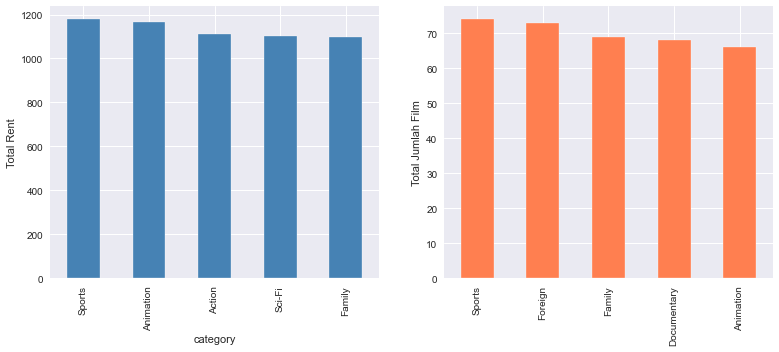

In [169]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.ylabel('Total Rent')
data.groupby(by='category').sum().sort_values(by='rent',ascending=False)['rent'].head(5).plot(kind='bar', color='steelblue')
plt.subplot(1,3,2)
plt.ylabel('Total Jumlah Film')
data.category.value_counts()[:5].plot(kind='bar', color='coral')

Dari hasil grafik di atas bisa ditarik kesimpulan untuk film dengan kategori *Sports*, *Animation*, *Action*, *Sci-Fi* dan *Family* merupakan Total Rent terbanyak yang menarik perhatian customer. Sedangkan jika dilihat dari 5 Kategori terbanyak untuk keseluruhan film, hanya kategori *Sports*, *Family* dan *Animation* yang menarik perhatian customer. Serta terdapat kategori *Foreign* dan *Documentary* yang kurang menarik perhatian customer.

**Expensive Rent Film Rate Per Day**

<AxesSubplot:xlabel='rent', ylabel='title'>

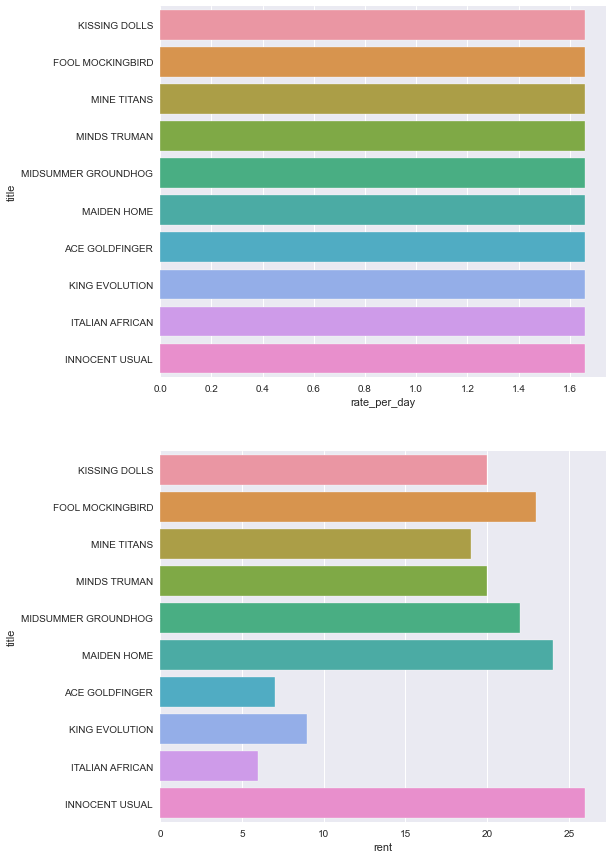

In [170]:
plt.figure(figsize=(8,15))
plt.subplot(2,1,1)
sns.barplot(data = data.sort_values(by='rate_per_day', ascending=False)[:10], x='rate_per_day', y='title')
plt.subplot(2,1,2)
sns.barplot(data = data.sort_values(by='rate_per_day', ascending=False)[:10], x='rent', y='title')

Plot diatas merupakan 10 film dengan nilai sewa per hari tertinggi disertai dengan jumlah sewa yang dimiliki oleh masing-masing film. Dapat dilihat terdapat 3 film yang memiliki harga sewa tinggi sedangkan jumlah sewa yang dihasilkan dibawah 10 kali. Insight yang dapat diambil adalah pemilik toko dapat menurunkan sedikit harga sewa agar lebih terjangkau oleh pelanggan dan meningkatkan minat pelanggan terhadap film tersebut.

**Statistika : Uji Statistik**

In [171]:
# Uji Normalitas Banyaknya Sewa (rent)

from scipy.stats import shapiro

norm, pval = shapiro(data['rent'])

if pval < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pval} < 5%)')
    print ('DATA TIDAK TERDISTRIBUSI NORMAL')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pval} > 5%)')
    print ('DATA TERDISTRIBUSI NORMAL')

Tolak H0 Karena P-Value (1.4384552571300446e-07 < 5%)
DATA TIDAK TERDISTRIBUSI NORMAL


Dari hasil uji statistik di atas diketahui bahwa nilai banyaknya sewa (rent) tidak terdistribusi normal. Hal ini mengarahkan pada uji Kruskal Walls yang akan digunakan selanjutnya untuk menguji nilai banyaknya sewa berdasarkan rating.

In [175]:
# Uji Perbandingan Banyaknya Sewa (rent) berdasarkan Rating (Kruskal Wallis)

from scipy.stats import kruskal

krus, pvalkrus = kruskal(
    data[data['rating'] == 'PG-13']['rent'],
    data[data['rating'] == 'NC-17']['rent'],
    data[data['rating'] == 'R']['rent'],
    data[data['rating'] == 'PG']['rent'],
    data[data['rating'] == 'G']['rent']
) 

if pvalkrus < 0.05 :
    print (f'Tolak H0 Karena P-Value ({pvalkrus} < 5%)')
    print ('Terdapat Perbedaan Banyaknya Sewa pada setiap film dengan Rating yang ada')
else :
    print (f'Gagal Tolak H0 Karena P-Value ({pvalkrus} > 5%)')
    print ('Tidak Terdapat Perbedaan Banyaknya Sewa pada setiap film dengan Rating yang ada')

Gagal Tolak H0 Karena P-Value (0.4507682055542722 > 5%)
Tidak Terdapat Perbedaan Banyaknya Sewa pada setiap film dengan Rating yang ada


Hasil uji Kruskal Wall pada banyaknya sewa untuk 5 jenis rating film menunjukan bahwa tidak terdapat perbedaan.

**Korelasi Antar Variabel**

Dengan melihat korelasi antar variabel dapat dilihat variabel apa saja yang berpengaruh terhadap suatu variabel tertentu. Hal ini dapat menjadi bahan analisis dalam menginterpretasikan suatu permasalahan nantinya.

<AxesSubplot:>

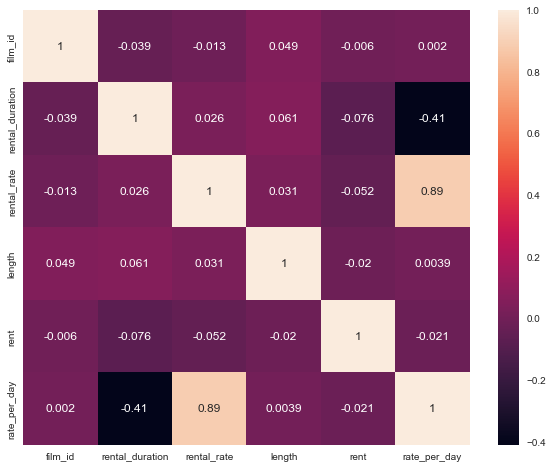

In [177]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(method='spearman'),annot=True)
